2.1.1 Effect of sharpening on edge detection

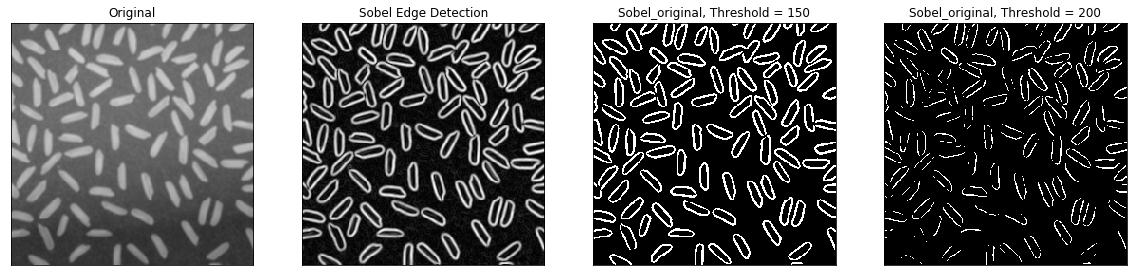

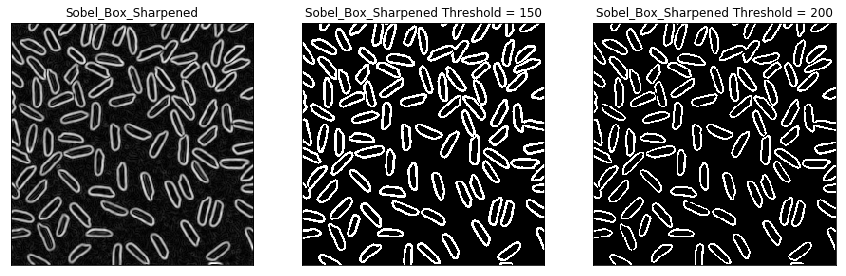

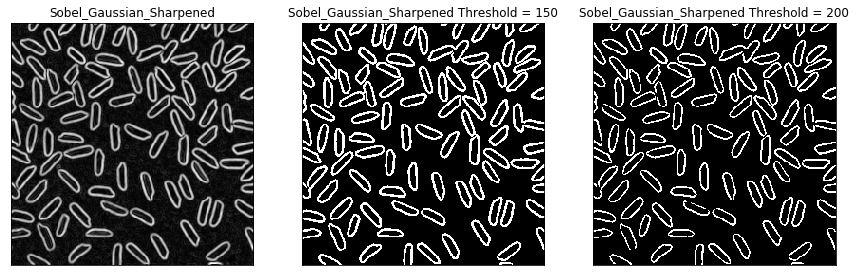

In [56]:
# Xijun(Claire) LIU 260654285
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Apply a Sobel edge detector to the image 'rice'. 

# load the image as grayscale
img_path = "./rice.png"
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply a 3x3 Sobel filter
I_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
I_sobel = cv2.magnitude(I_x, I_y)


# set the threshold
threshold1 = 150
threshold2 = 200

#cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst
ret, thresh1 = cv2.threshold(I_sobel, threshold1, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(I_sobel, threshold2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(I_sobel, cmap="gray")
plt.title("Sobel Edge Detection"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh1, cmap="gray")
plt.title("Sobel_original, Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(thresh2, cmap="gray")
plt.title("Sobel_original, Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()



#Apply a Sobel edge detector to the sharpened image of 'rice'. 

# create a box filter
kernel = np.ones((5,5), np.float32)/(5*5)
# box filter and sharpen the image 
box_Blur = cv2.filter2D(img, -1, kernel)
detail_box = img - box_Blur
box_sharpen = img + detail_box
box_sharpen_gray = cv2.cvtColor(box_sharpen, cv2.COLOR_BGR2GRAY)

# apply a 3x3 Sobel filter to box sharpened image
box_sharpen_x = cv2.Sobel(box_sharpen_gray, cv2.CV_64F, 1, 0, ksize=3)
box_sharpen_y = cv2.Sobel(box_sharpen_gray, cv2.CV_64F, 0, 1, ksize=3)
box_sharpen_sobel = cv2.magnitude(box_sharpen_x, box_sharpen_y)

ret, box_thresh1 = cv2.threshold(box_sharpen_sobel, threshold1, 255, cv2.THRESH_BINARY)
ret, box_thresh2 = cv2.threshold(box_sharpen_sobel, threshold2, 255, cv2.THRESH_BINARY)


#Apply a Sobel edge detector to the sharpened image of 'rice'. 

#Gaussian filter and sharpen the image
gaussian_Blur = cv2.GaussianBlur(img,(5,5), np.sqrt(2))
detail_gaussian = img - gaussian_Blur
gaussian_sharpen = img + detail_gaussian
gaussian_sharpen_gray = cv2.cvtColor(gaussian_sharpen, cv2.COLOR_BGR2GRAY)

# apply a 3x3 Sobel filter to gaussian sharpened image
gaussian_sharpen_x = cv2.Sobel(gaussian_sharpen_gray, cv2.CV_64F, 1, 0, ksize=3)
gaussian_sharpen_y = cv2.Sobel(gaussian_sharpen_gray, cv2.CV_64F, 0, 1, ksize=3)
gaussian_sharpen_sobel = cv2.magnitude(gaussian_sharpen_x, gaussian_sharpen_y)

ret, gaussian_thresh1 = cv2.threshold(gaussian_sharpen_sobel, threshold1, 255, cv2.THRESH_BINARY)
ret, gaussian_thresh2 = cv2.threshold(gaussian_sharpen_sobel, threshold2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(box_sharpen_sobel, cmap="gray")
plt.title("Sobel_Box_Sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(box_thresh1, cmap="gray")
plt.title("Sobel_Box_Sharpened Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(box_thresh2, cmap="gray")
plt.title("Sobel_Box_Sharpened Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(gaussian_sharpen_sobel, cmap="gray")
plt.title("Sobel_Gaussian_Sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(gaussian_thresh1, cmap="gray")
plt.title("Sobel_Gaussian_Sharpened, Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(gaussian_thresh2, cmap="gray")
plt.title("Sobel_Gaussian_Sharpened, Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()




From the result above, it can be observed that the sobel edge detection for the sharpened images have better results. This is because the sharpening method provides a much clearer edge than the original image.

2.1.2 Effect of denoising on edge detection

max of img_woman 795.0308170127747


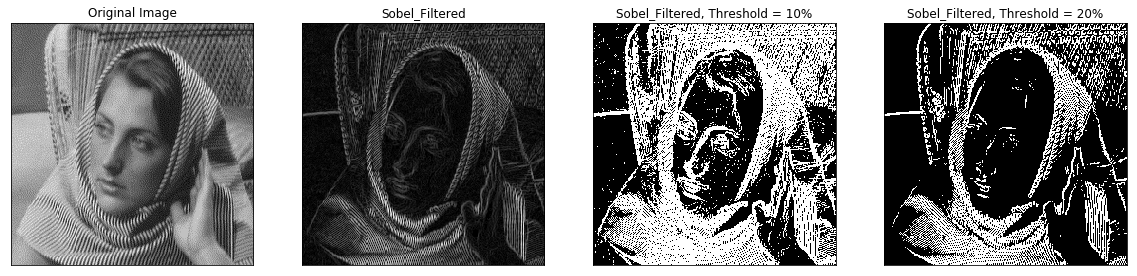

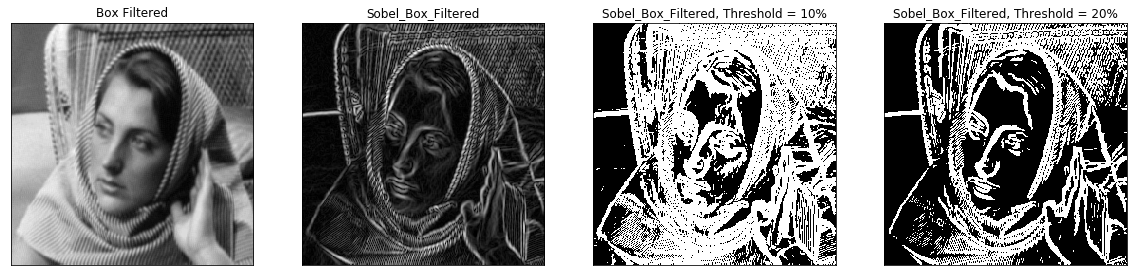

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt
# load the image 
img_path = "./woman.png"
img_woman = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

#Generate filtered image of "woman"
sobel_woman_x = cv2.Sobel(img_woman, cv2.CV_64F, 1, 0, ksize=3)
sobel_woman_y = cv2.Sobel(img_woman, cv2.CV_64F, 0, 1, ksize=3)
sobel_woman = cv2.magnitude(sobel_woman_x, sobel_woman_y)

#Find maximum value of the image "woman"
max_woman = np.amax(sobel_woman)

#Define the thresholds
threshold1 = 0.1*max_woman
threshold2 = 0.2*max_woman

#Generate threshold images
ret, thresh1 = cv2.threshold(sobel_woman, threshold1, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(sobel_woman, threshold2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_woman, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_woman, cmap="gray")
plt.title("Sobel_Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh1, cmap="gray")
plt.title("Sobel_Filtered, Threshold = 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(thresh2, cmap="gray")
plt.title("Sobel_Filtered, Threshold = 20%"), plt.xticks([]), plt.yticks([])
plt.show()


# box filter the original image 
img_woman_box = cv2.blur(img_woman,(3,3))
sobel_woman_box_x = cv2.Sobel(img_woman_box,cv2.CV_64F,1,0,ksize=3)
sobel_woman_box_y = cv2.Sobel(img_woman_box,cv2.CV_64F,0,1,ksize=3)
sobel_woman_box = cv2.magnitude(sobel_woman_box_x, sobel_woman_box_y)

# Sobel Filter
max_woman_box = np.amax(sobel_woman_box)
box_threshold3 = 0.1 * max_woman_box
box_threshold4 = 0.2 * max_woman_box

ret, box_thresh3 = cv2.threshold(sobel_woman_box,box_threshold3, 255, cv2.THRESH_BINARY)
ret, box_thresh4 = cv2.threshold(sobel_woman_box,box_threshold4, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_woman_box, cmap="gray")
plt.title("Box Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_woman_box, cmap="gray")
plt.title("Sobel_Box_Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(box_thresh3, cmap="gray")
plt.title("Sobel_Box_Filtered, Threshold = 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(box_thresh4, cmap="gray")
plt.title("Sobel_Box_Filtered, Threshold = 20%"), plt.xticks([]), plt.yticks([])
plt.show()


The filtered image gives more details about the edge. As the noise has been filtered out by the box filter, the signal is "stronger", and will give a clearer edge by the edge detection.